# **Blood Pressure Analysis Using Hypothesis Testing**

# **Objective:**
To analyze a healthcare dataset and perform statistical hypothesis testing to:
- Check if the average blood pressure is significantly different from the standard values (120/80 mmHg).
- Compare blood pressure between diabetic and non-diabetic individuals.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/Health.csv'
df = pd.read_csv(file_path)
print(df.head())


   Gender  Age  SystolicBP  DiastolicBP Diabetic
0    Male   46         134           98      Yes
1  Female   41         111           86       No
2    Male   46         138           66      Yes
3    Male   21         108           82       No
4    Male   42         136           81       No


Systolic BP Test
Mean = 124.35
t-statistic = 5.23, p-value = 0.0000

Diastolic BP Test
Mean = 81.99
t-statistic = 3.23, p-value = 0.0014

Conclusion:
Systolic BP: Reject H₀ (Significantly different)
Diastolic BP: Reject H₀ (Significantly different)


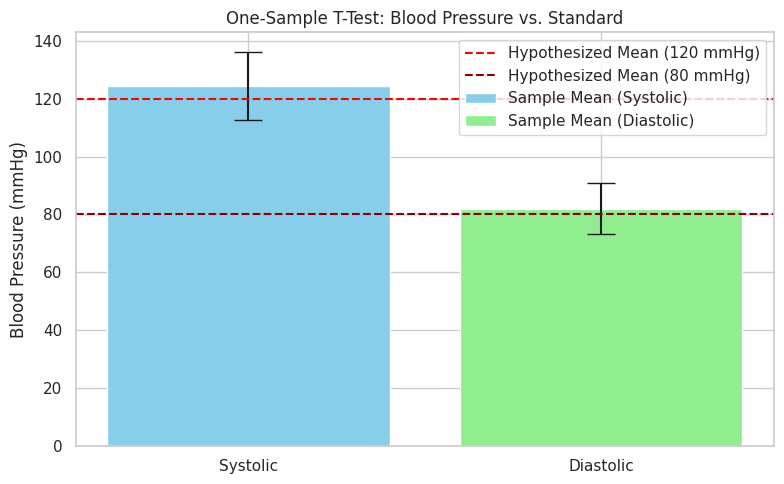

In [ ]:
# A hypothesis test to see if the average blood pressure in the dataset is significantly different from the normal values

from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt
import seaborn as sns

# hypothesized means
hyp_systolic = 120
hyp_diastolic = 80

# one-sample t-tests
t_stat_sys, p_val_sys = ttest_1samp(df['SystolicBP'], hyp_systolic)
t_stat_dia, p_val_dia = ttest_1samp(df['DiastolicBP'], hyp_diastolic)


print("Systolic BP Test")
print(f"Mean = {df['SystolicBP'].mean():.2f}")
print(f"t-statistic = {t_stat_sys:.2f}, p-value = {p_val_sys:.4f}")

print("\nDiastolic BP Test")
print(f"Mean = {df['DiastolicBP'].mean():.2f}")
print(f"t-statistic = {t_stat_dia:.2f}, p-value = {p_val_dia:.4f}")

# at 5% significance level
alpha = 0.05
print("\nConclusion:")
print("Systolic BP:", "Reject H₀ (Significantly different)" if p_val_sys < alpha else "Fail to reject H₀ (Not significantly different)")
print("Diastolic BP:", "Reject H₀ (Significantly different)" if p_val_dia < alpha else "Fail to reject H₀ (Not significantly different)")




# Graph

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Systolic
plt.bar(0, df['SystolicBP'].mean(), yerr=df['SystolicBP'].std(), color='skyblue', capsize=10, label='Sample Mean (Systolic)')
plt.axhline(120, color='red', linestyle='--', label='Hypothesized Mean (120 mmHg)')

# Diastolic
plt.bar(1, df['DiastolicBP'].mean(), yerr=df['DiastolicBP'].std(), color='lightgreen', capsize=10, label='Sample Mean (Diastolic)')
plt.axhline(80, color='darkred', linestyle='--', label='Hypothesized Mean (80 mmHg)')



plt.xticks([0, 1], ['Systolic', 'Diastolic'])
plt.ylabel('Blood Pressure (mmHg)')
plt.title('One-Sample T-Test: Blood Pressure vs. Standard')
plt.legend()
plt.tight_layout()
plt.show()


A one-sample t-test was performed to compare the average blood pressure in the dataset with the standard values (120/80 mmHg). The results showed that the mean systolic BP (124.35 mmHg) and diastolic BP (81.99 mmHg) were both significantly higher than normal, with p-values less than 0.05. Therefore, we reject the null hypothesis and conclude that the average blood pressure in the dataset is different from the normal standard.


Systolic BP: Diabetic vs Non-Diabetic
Mean (Diabetic): 129.67
Mean (Non-Diabetic): 122.94
t-statistic = 3.86, p-value = 0.0002

Diastolic BP: Diabetic vs Non-Diabetic
Mean (Diabetic): 85.29
Mean (Non-Diabetic): 81.11
t-statistic = 2.54, p-value = 0.0139


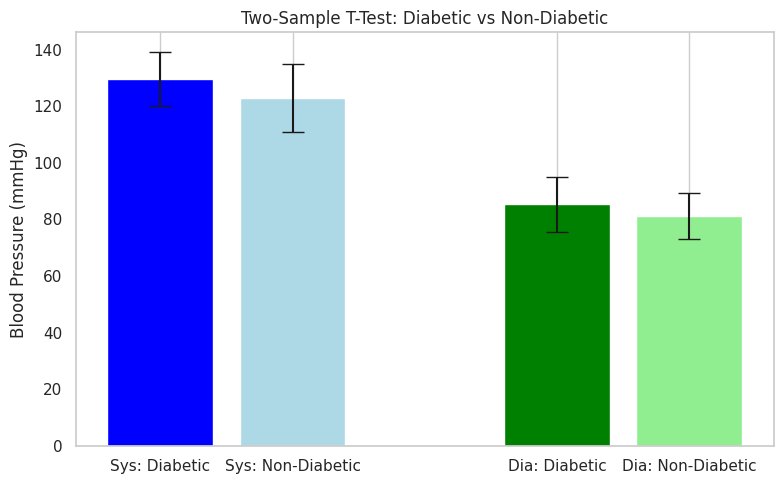

In [ ]:
# Comparaing systolic and diastolic blood pressure between diabetic and non-diabetic individuals

from scipy.stats import ttest_ind

# Group data
diabetic_sys = df[df['Diabetic'] == 'Yes']['SystolicBP']
non_diabetic_sys = df[df['Diabetic'] == 'No']['SystolicBP']

diabetic_dia = df[df['Diabetic'] == 'Yes']['DiastolicBP']
non_diabetic_dia = df[df['Diabetic'] == 'No']['DiastolicBP']

# Two-sample t-tests
t_stat_sys, p_val_sys = ttest_ind(diabetic_sys, non_diabetic_sys, equal_var=False)
t_stat_dia, p_val_dia = ttest_ind(diabetic_dia, non_diabetic_dia, equal_var=False)


print("Systolic BP: Diabetic vs Non-Diabetic")
print(f"Mean (Diabetic): {diabetic_sys.mean():.2f}")
print(f"Mean (Non-Diabetic): {non_diabetic_sys.mean():.2f}")
print(f"t-statistic = {t_stat_sys:.2f}, p-value = {p_val_sys:.4f}")

print("\nDiastolic BP: Diabetic vs Non-Diabetic")
print(f"Mean (Diabetic): {diabetic_dia.mean():.2f}")
print(f"Mean (Non-Diabetic): {non_diabetic_dia.mean():.2f}")
print(f"t-statistic = {t_stat_dia:.2f}, p-value = {p_val_dia:.4f}")



# Graph
plt.figure(figsize=(8, 5))
bar_positions = [0, 1, 3, 4]
bp_means = [diabetic_sys.mean(), non_diabetic_sys.mean(), diabetic_dia.mean(), non_diabetic_dia.mean()]
bp_std = [diabetic_sys.std(), non_diabetic_sys.std(), diabetic_dia.std(), non_diabetic_dia.std()]
labels = ['Sys: Diabetic', 'Sys: Non-Diabetic', 'Dia: Diabetic', 'Dia: Non-Diabetic']
colors = ['blue', 'lightblue', 'green', 'lightgreen']



plt.bar(bar_positions, bp_means, yerr=bp_std, capsize=8, color=colors)
plt.xticks(bar_positions, labels)
plt.ylabel('Blood Pressure (mmHg)')
plt.title('Two-Sample T-Test: Diabetic vs Non-Diabetic')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



In this test, we compared the systolic and diastolic blood pressure between diabetic and non-diabetic individuals using a two-sample t-test. The null hypothesis (H₀) stated that there is no significant difference in mean blood pressure between the two groups — that is, diabetics and non-diabetics have the same average blood pressure. The alternative hypothesis (H₁) stated that there is a significant difference in average blood pressure between the groups.

The results showed p-values of 0.0002 (systolic) and 0.0139 (diastolic), both of which are less than the significance level of 0.05. Therefore, we reject the null hypothesis and conclude that diabetes is associated with significantly higher systolic and diastolic blood pressure in this dataset.

# **Conclusion**

In this project, we used one-sample and two-sample t-tests to analyze blood pressure data from 200 individuals.

- The one-sample t-test showed that the average systolic and diastolic blood pressure values in the dataset are higher than the standard 120/80 mmHg.
- The two-sample t-test revealed that diabetic individuals have significantly higher systolic and diastolic blood pressure than non-diabetic individuals, with p-values well below the 0.05 threshold.

These results suggest that both the overall population in the dataset and the diabetic group show elevated blood pressure levels, which aligns with medical expectations. The use of statistical testing helped confirm these insights in a data driven way.


# **Final Outcome:**
The null hypotheses were rejected in all cases, indicating statistically significant differences in blood pressure measurements based on population standards and diabetic status.
